In [208]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Turn off scientific notation globally
pd.set_option('display.float_format', '{:.2f}'.format)

In [209]:
df_bureau = pd.read_csv("../Data/bureau_data.csv")
df_customers = pd.read_csv("../Data/customers.csv")
df_loans = pd.read_csv("../Data/loans.csv")

In [210]:
df_bureau.shape, df_customers.shape, df_loans.shape

((50000, 8), (50000, 12), (50000, 15))

In [211]:
print(df_bureau.isna().value_counts())

cust_id  number_of_open_accounts  number_of_closed_accounts  total_loan_months  delinquent_months  total_dpd  enquiry_count  credit_utilization_ratio
False    False                    False                      False              False              False      False          False                       50000
Name: count, dtype: int64


In [212]:
df_customers.isna().value_counts()

cust_id  age    gender  marital_status  employment_status  income  number_of_dependants  residence_type  years_at_current_address  city   state  zipcode
False    False  False   False           False              False   False                 False           False                     False  False  False      49938
                                                                                         True            False                     False  False  False         62
Name: count, dtype: int64

In [213]:
df_loans.isna().value_counts()

loan_id  cust_id  loan_purpose  loan_type  sanction_amount  loan_amount  processing_fee  gst    net_disbursement  loan_tenure_months  principal_outstanding  bank_balance_at_application  disbursal_date  installment_start_dt  default
False    False    False         False      False            False        False           False  False             False               False                  False                        False           False                 False      50000
Name: count, dtype: int64

In [214]:
df_bureau.head(2)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4


In [215]:
df_loans.head(2)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False


In [216]:
df_customers.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001


In [217]:
df = pd.merge(df_customers,df_loans,on="cust_id")

In [218]:
df = pd.merge(df,df_bureau,on="cust_id")

In [219]:
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,False,4,2,120,0,0,5,10


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [221]:
df.default = df.default.astype(int)

In [222]:
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

<p><b>Class imbalance in the dataset</b></p>

In [223]:
42703/4297

9.937863625785432

### For Avoiding Data Leakage. Splitting the data at he beginning

In [224]:
X = df.drop("default",axis = 1)
y = df["default"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

df_train = pd.concat([X_train,y_train],axis=1)
df_test = pd.concat([X_test,y_test],axis=1)

In [225]:
print(df_train.dtypes.unique())
num_col = df_train.select_dtypes(include = ["int64","float64"]).columns.tolist()
catago_cal = df_train.select_dtypes(include = "O").columns.tolist()

[dtype('O') dtype('int64') dtype('float64')]


In [226]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37500 entries, 27434 to 15795
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      37500 non-null  object 
 1   age                          37500 non-null  int64  
 2   gender                       37500 non-null  object 
 3   marital_status               37500 non-null  object 
 4   employment_status            37500 non-null  object 
 5   income                       37500 non-null  int64  
 6   number_of_dependants         37500 non-null  int64  
 7   residence_type               37452 non-null  object 
 8   years_at_current_address     37500 non-null  int64  
 9   city                         37500 non-null  object 
 10  state                        37500 non-null  object 
 11  zipcode                      37500 non-null  int64  
 12  loan_id                      37500 non-null  object 
 13  loan_purpose     

In [227]:
for col in catago_cal:
    print(col,"-->",df_train[col].unique())

cust_id --> ['C27435' 'C13401' 'C00884' ... 'C38159' 'C00861' 'C15796']
gender --> ['F' 'M']
marital_status --> ['Single' 'Married']
employment_status --> ['Salaried' 'Self-Employed']
residence_type --> ['Owned' 'Mortgage' 'Rented' nan]
city --> ['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
state --> ['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
loan_id --> ['L27435' 'L13401' 'L00884' ... 'L38159' 'L00861' 'L15796']
loan_purpose --> ['Home' 'Auto' 'Personal' 'Education' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
disbursal_date --> ['2022-04-21' '2020-11-24' '2019-08-25' ... '2024-04-06' '2021-11-30'
 '2021-11-24']
installment_start_dt --> ['2022-05-21' '2020-12-11' '2019-09-19' ... '2024-08-16' '2019-07-27'
 '2022-12-02']


In [228]:
df_train["loan_purpose"] = df_train.loan_purpose.replace("Personaal","Personal")
df_test["loan_purpose"] = df_test.loan_purpose.replace("Personaal","Personal")

In [229]:
print(df_test.loan_purpose.unique())
print(df_train.loan_purpose.unique())

['Education' 'Home' 'Auto' 'Personal']
['Home' 'Auto' 'Personal' 'Education']


residence_type --> ['Owned' 'Mortgage' 'Rented' nan]  nan value to replace

In [230]:
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [231]:
df_train["residence_type"].isna().value_counts()

residence_type
False    37452
True        48
Name: count, dtype: int64

In [232]:
df_train["residence_type"] = df_train["residence_type"].fillna(mode_residence)

In [233]:
df_train["residence_type"].unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

#### Duplicates Finding

In [234]:
df_train.duplicated().sum()

np.int64(0)

### Finding Outliyers

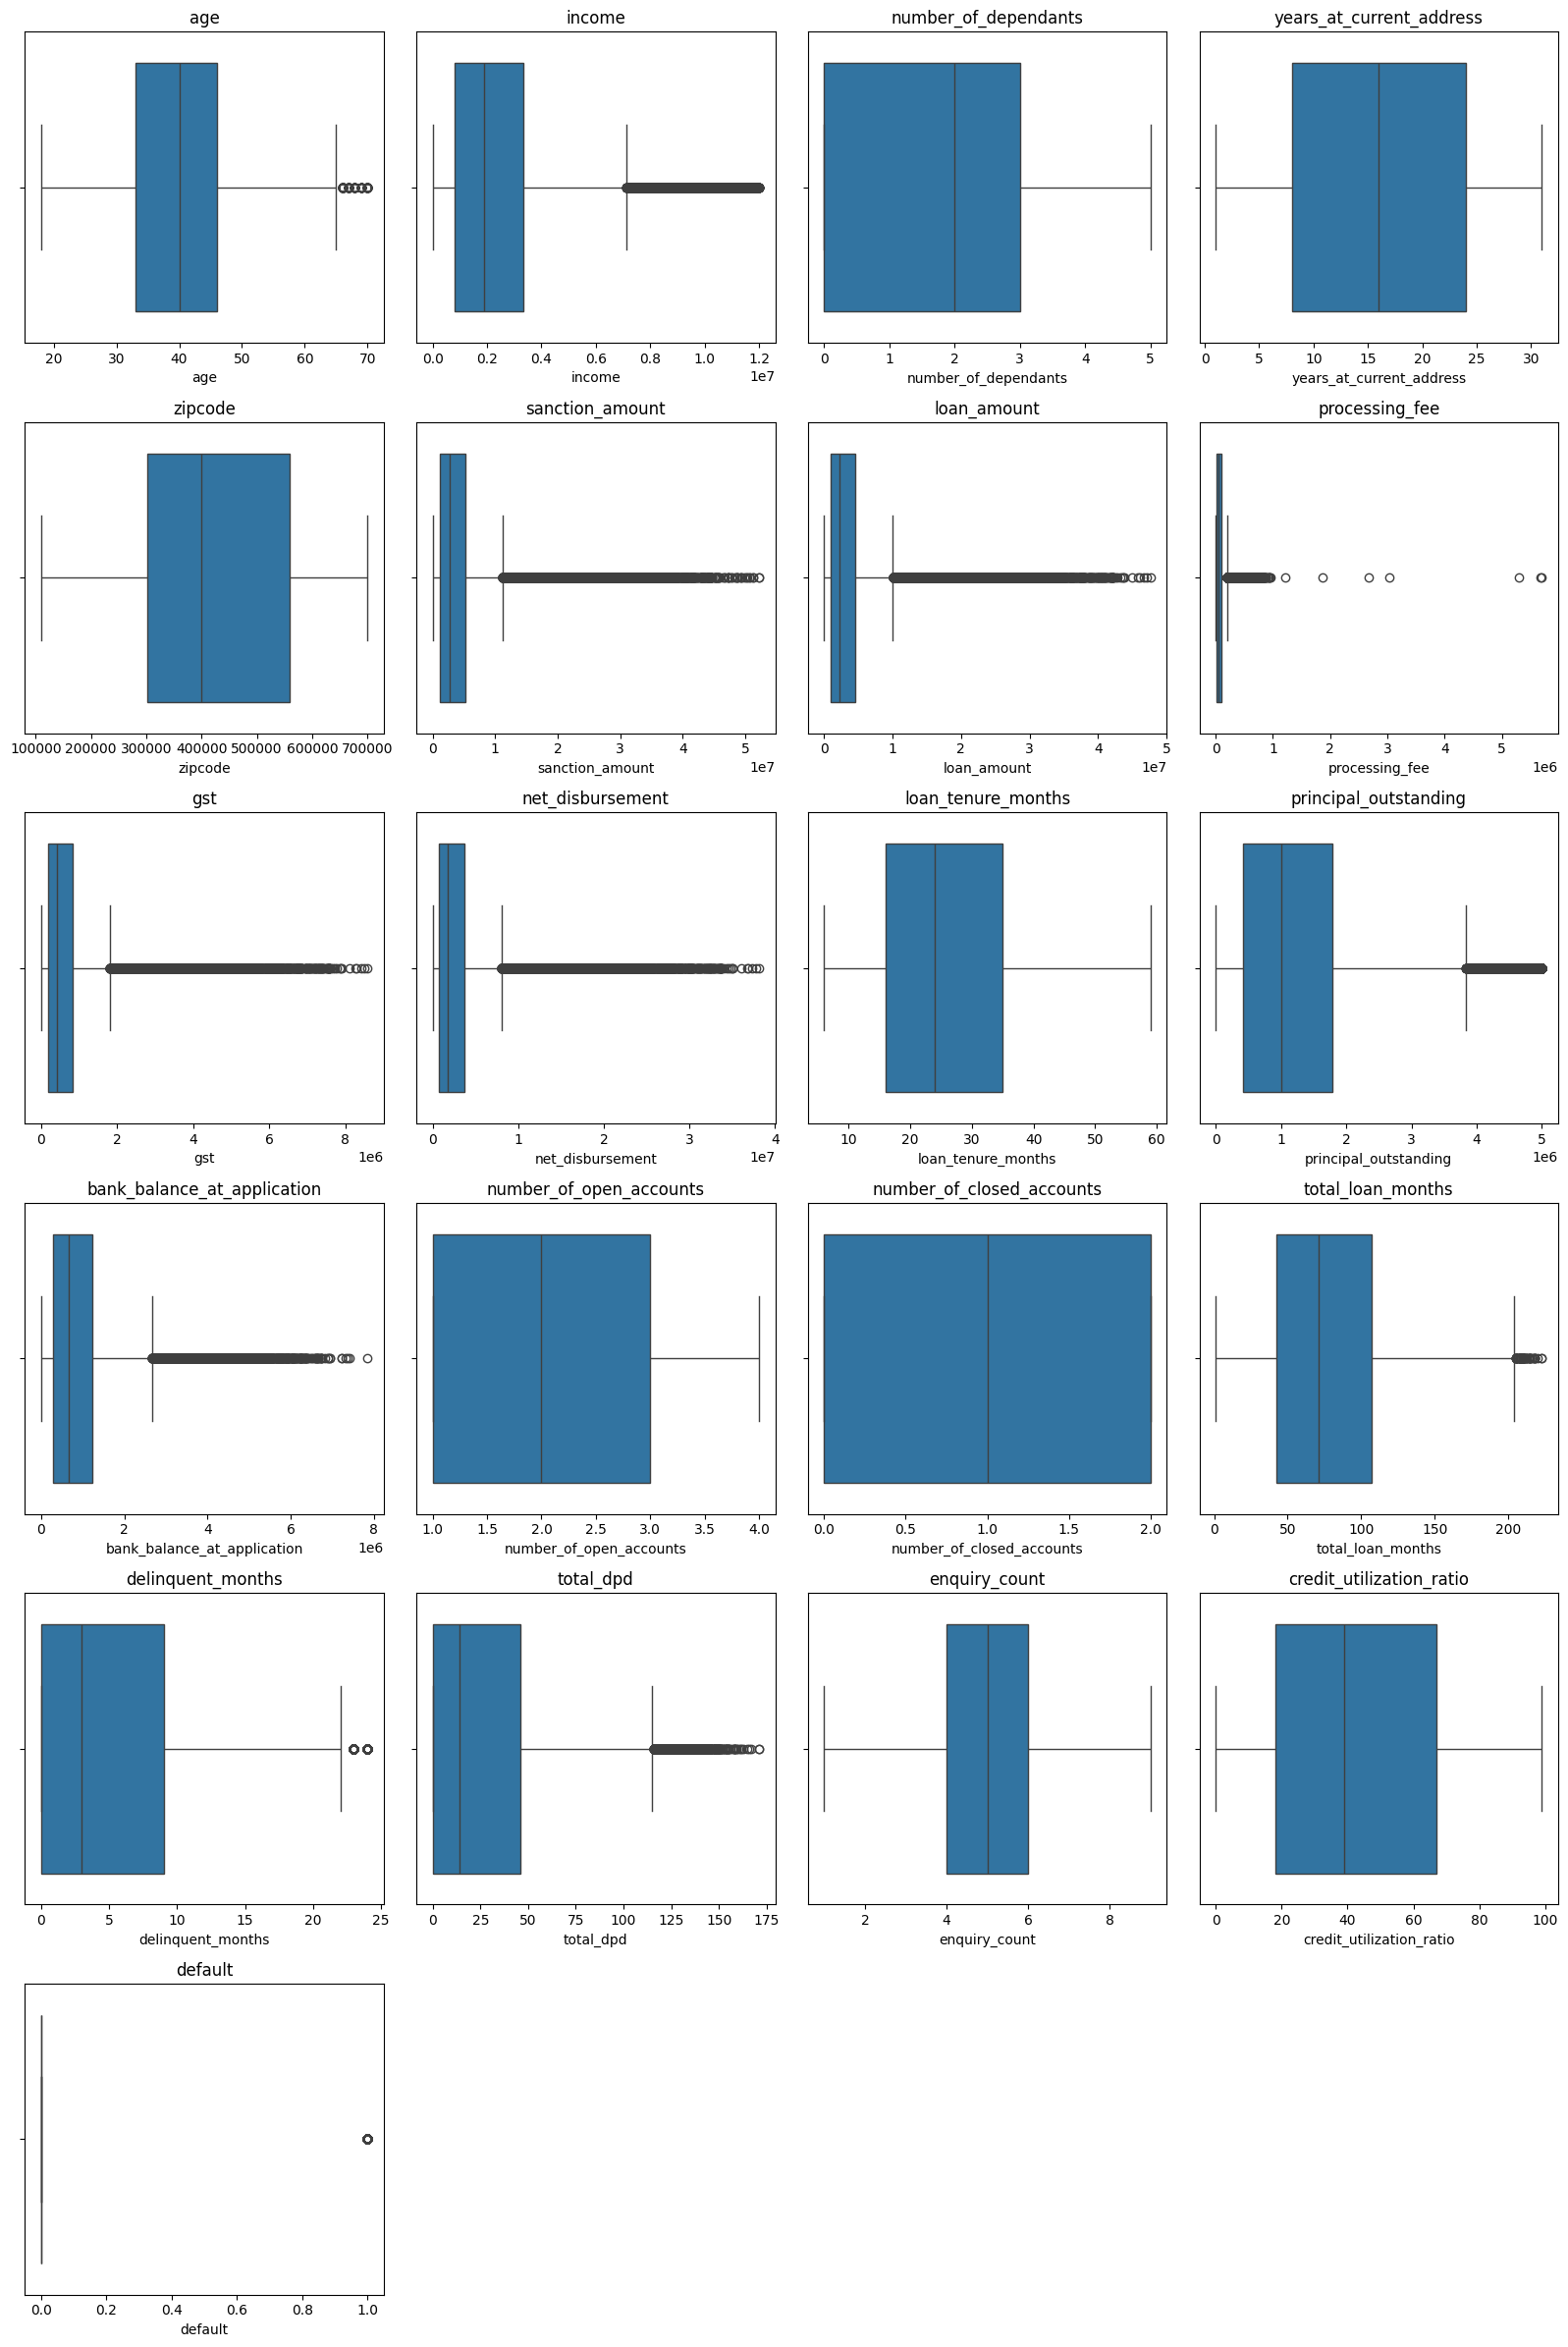

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

n_cols = 4
n_rows = math.ceil(len(num_col) / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
axs = axs.flatten()

for i, col in enumerate(num_col):
    sns.boxplot(x=df_train[col], ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_ylabel('')

# Hide extra axes
for ax in axs[len(num_col):]:
    ax.remove()

plt.tight_layout()
plt.show()


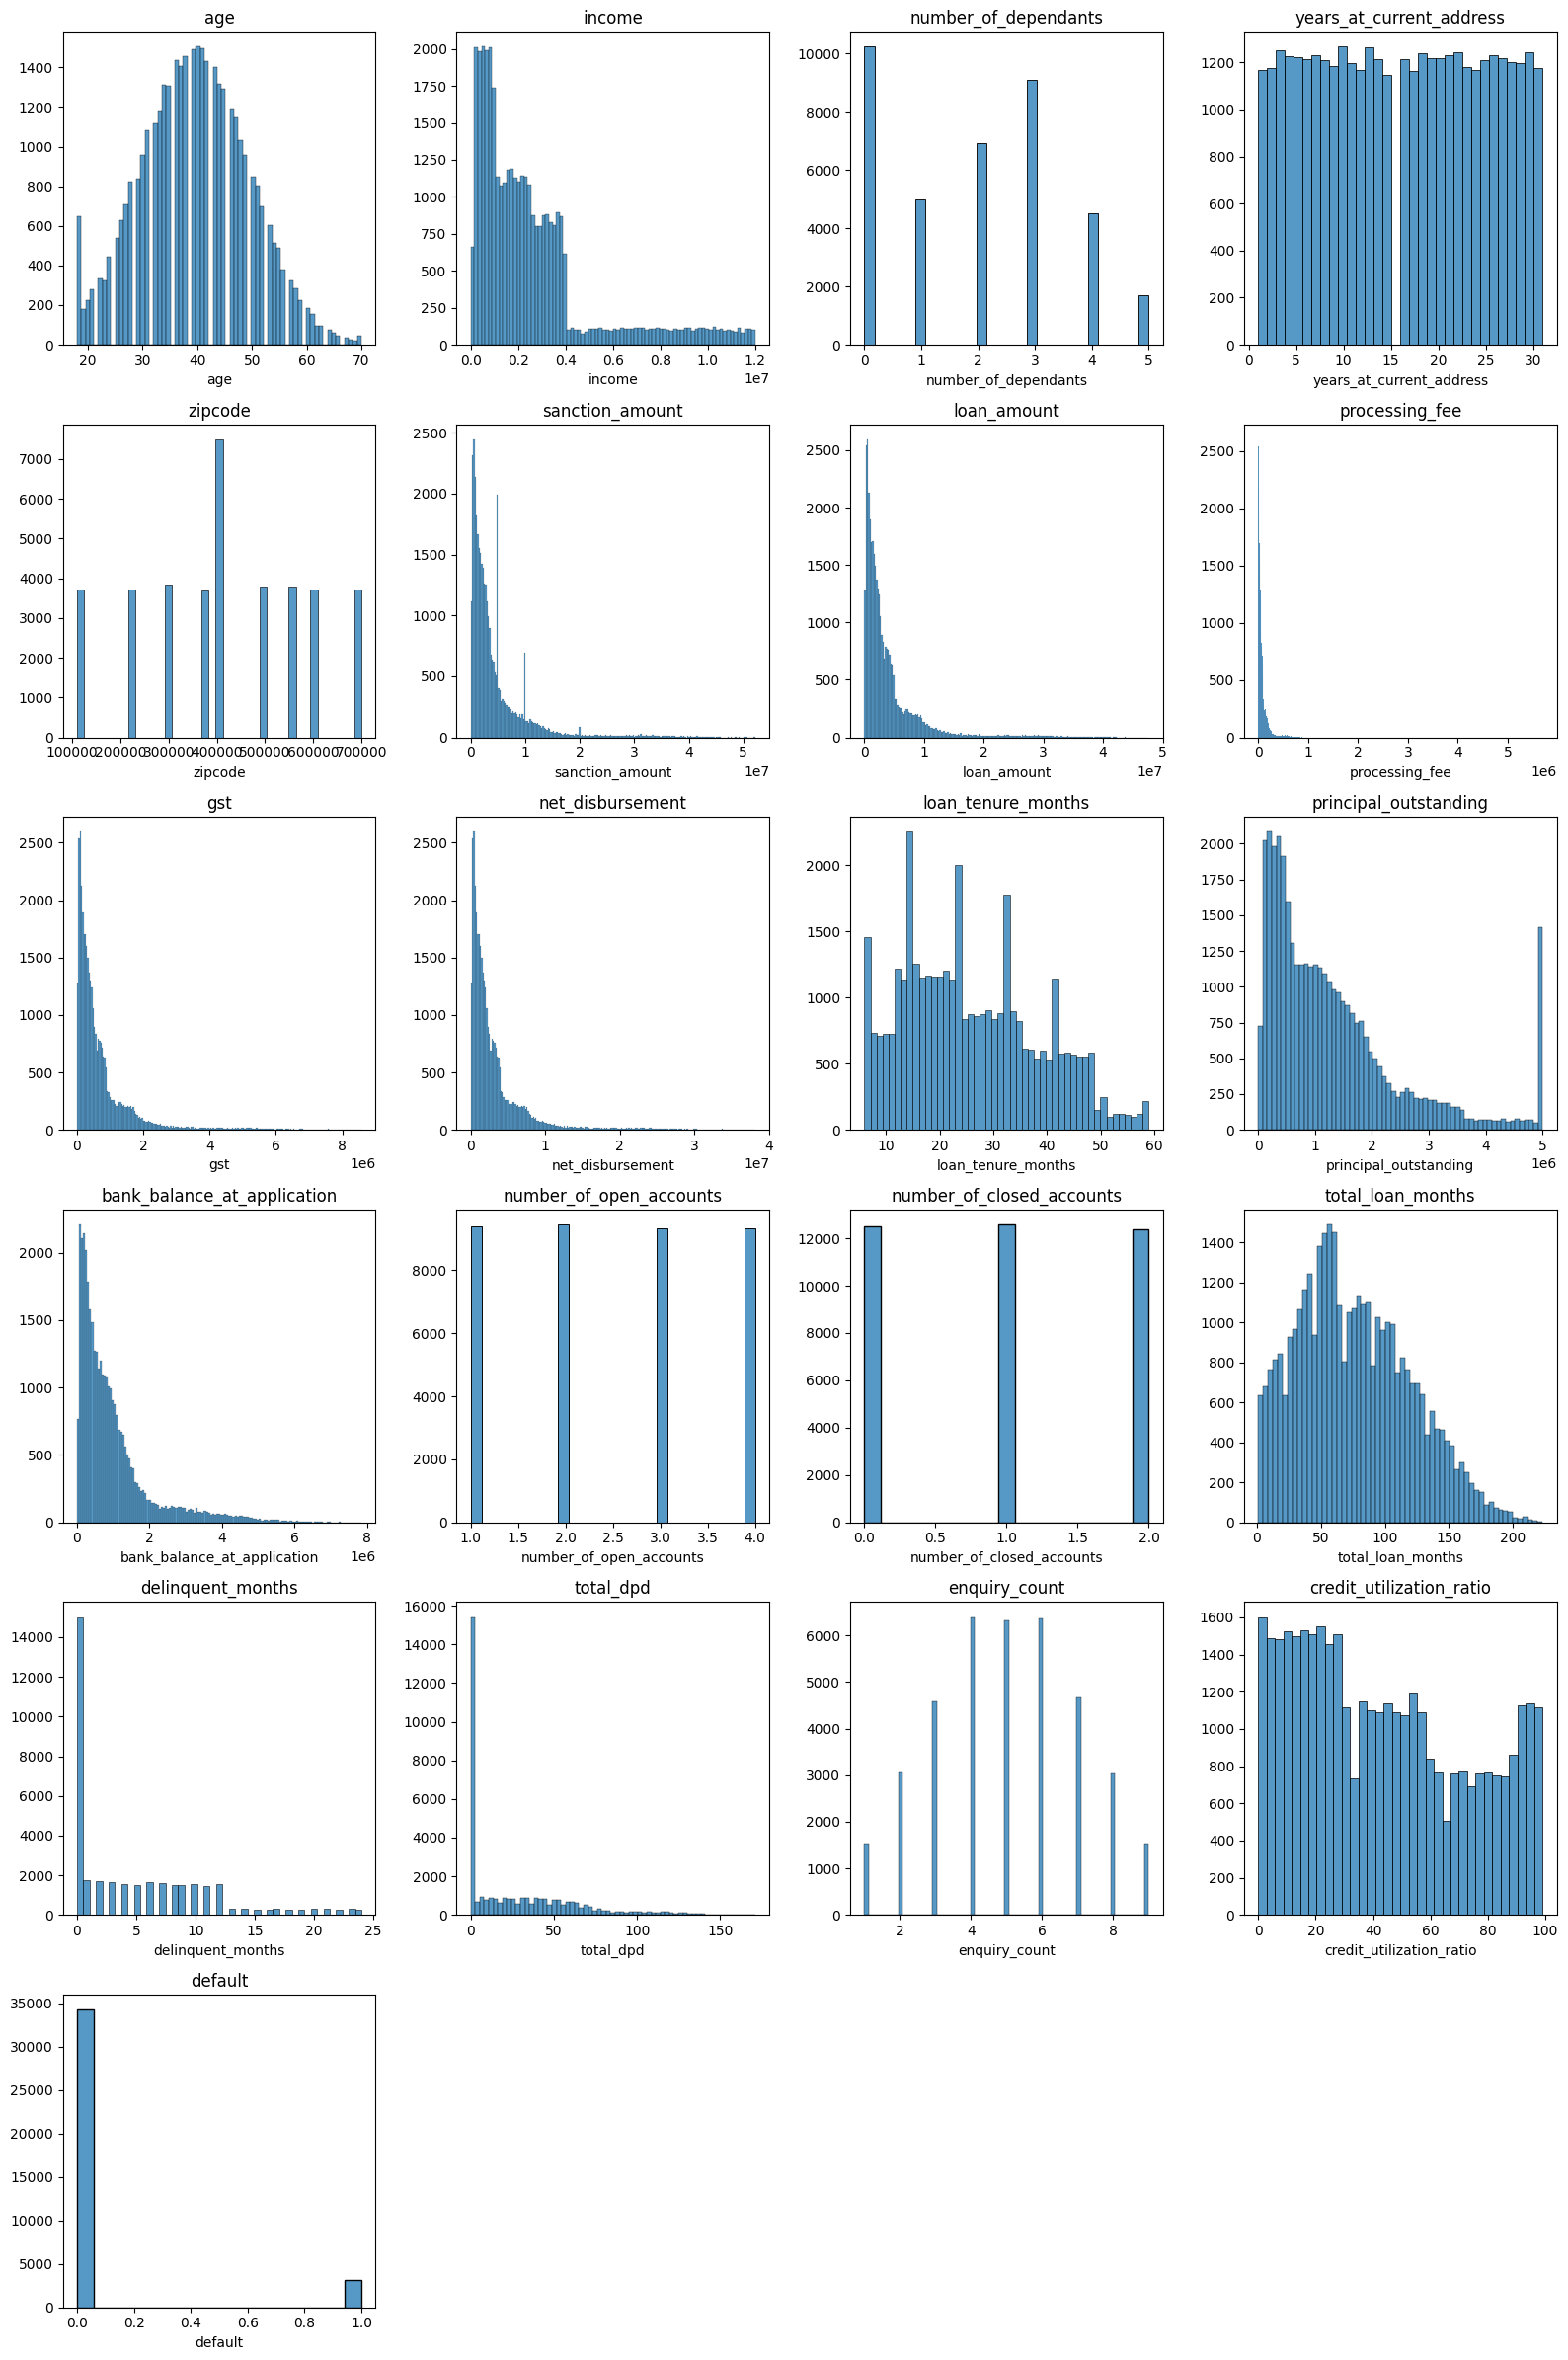

In [236]:
n_cols = 4
n_rows = math.ceil(len(num_col) / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
axs = axs.flatten()

for i, col in enumerate(num_col):
    sns.histplot(x=df_train[col], ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_ylabel('')

# Hide extra axes
for ax in axs[len(num_col):]:
    ax.remove()

plt.tight_layout()
plt.show()


In [237]:
df_train.processing_fee.describe()

count     37500.00
mean      80724.11
std      120830.65
min           0.00
25%       19180.00
50%       44700.00
75%       92000.00
max     5698029.90
Name: processing_fee, dtype: float64

In [238]:
df_train[(df_train.processing_fee/df_train.loan_amount) > 0.03][["processing_fee","loan_amount"]]

,processing_fee,loan_amount
23981,2669791.02,2234000
9898,5293543.52,3626000
47089,1858964.77,1738000
33705,5678020.86,3812000
12294,5698029.90,4639000
28174,1214492.67,966000
29305,3036378.01,2616000


In [239]:
df_train_1 = df_train[(df_train.processing_fee/df_train.loan_amount) < 0.03].copy()

In [240]:
df_test = df_test[(df_test.processing_fee/df_test.loan_amount) < 0.03].copy()

In [241]:
df_test.shape

(12498, 33)

<h3 align="center" style="color:blue">Exploratory Data Analysis</h3>

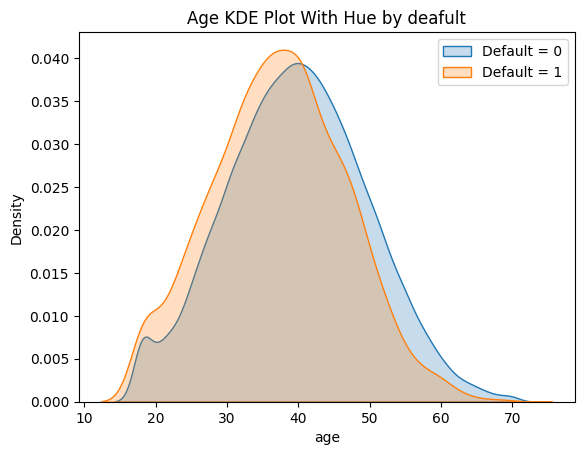

In [242]:
sns.kdeplot(df_train_1[df_train_1.default==0].age,fill=True,label="Default = 0")
sns.kdeplot(df_train_1[df_train_1.default==1].age,fill=True,label="Default = 1")
plt.title(f"Age KDE Plot With Hue by deafult")
plt.legend()
plt.show()

C:\Users\lv909\AppData\Local\Temp\ipykernel_17104\3213010023.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_train_1[col][df_train_1["default"]==0],fill=True,label="Default = 0")
C:\Users\lv909\AppData\Local\Temp\ipykernel_17104\3213010023.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_train_1[col][df_train_1["default"]==1],fill=True,label="Default = 1")


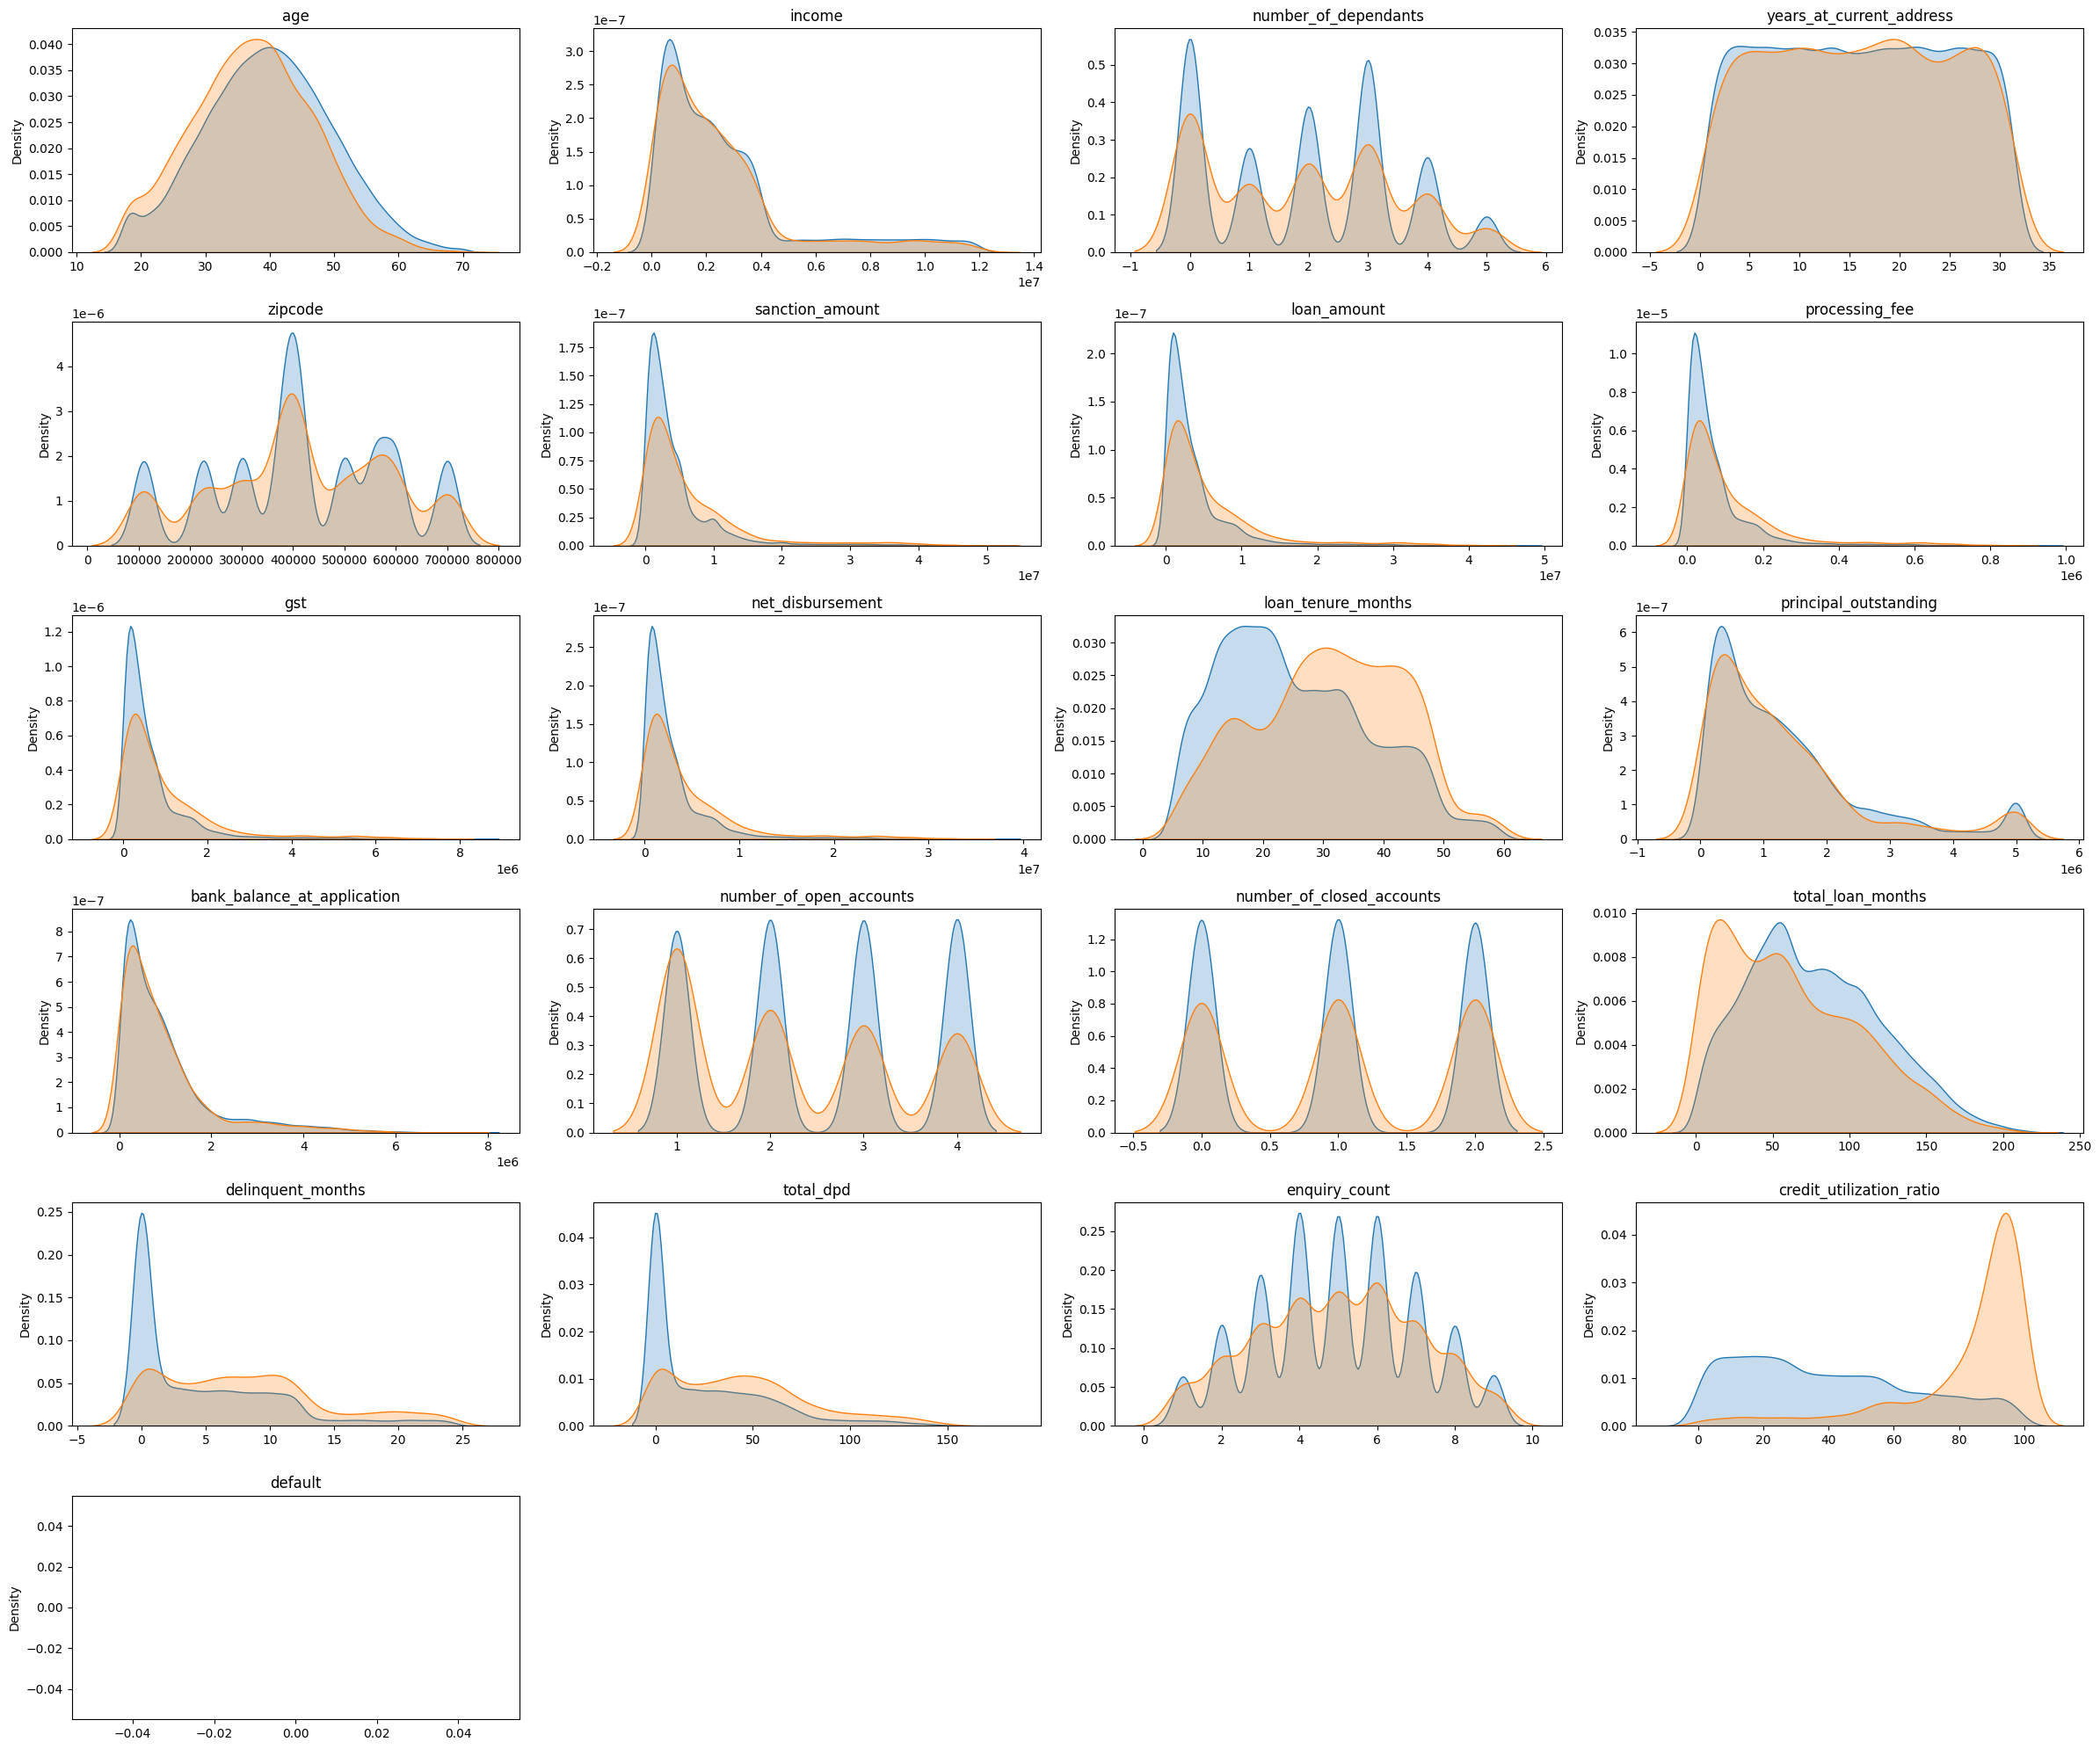

In [243]:
plt.figure(figsize=(24,20))

for i, col in enumerate(num_col):
    plt.subplot(6,4,i+1)
    sns.kdeplot(df_train_1[col][df_train_1["default"]==0],fill=True,label="Default = 0")
    sns.kdeplot(df_train_1[col][df_train_1["default"]==1],fill=True,label="Default = 1")
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

Insights

1. Separation between curves → If the blue (Default = 0) and orange (Default = 1) curves differ a lot, that feature is potentially useful for predicting default.

2. Overlap → If both curves almost overlap, that feature might not add much predictive power.

3. Skewness / peaks → Tells you how the data is distributed, and if transformations (like log scaling) may help.


🔹 Feature-wise insights (from your chart)

1. Age → Both groups overlap heavily → little predictive power.

2. Income → Default = 0 (blue) tends to have slightly higher income distribution. Defaults cluster more on lower incomes → useful feature.

3. Number of dependents → Strong spikes at integer values, but distribution looks similar → may not be strong.

4. Years at current address → Almost identical → low predictive power.

5. Loan amount / Processing fee / Net disbursement / Principal outstanding → Default = 1 group often has higher tails → larger loans are riskier. These features are important.

6. GST / Bank balance at application → Default = 0 people seem to maintain higher balances → useful.

7. Loan tenure months → Non-defaulters cluster around longer tenures → could be predictive.

8. Number of open/closed accounts → Similar shapes but some differences → weak/moderate predictive power.

Total loan months → Defaulters slightly biased towards lower loan months.

Delinquent months / Total DPD (days past due) → Huge separation → strong predictor of default (as expected).

Enquiry count → More enquiries = higher chance of default → predictive.

Credit utilization ratio → Very strong separation → defaults have much higher utilization.

<h3 align="center" style="color:blue">Feature Engineering</h3>

In [244]:
df_train_1[["loan_amount","income"]]

,loan_amount,income
27434,3276000,1131000
13400,2540000,2343000
883,1920000,2891000
7303,298000,272000
45124,260000,141000
...,...,...
11284,4760000,3506000
44732,5302000,3889000
38158,6570000,2420000
860,3194000,2133000


In [245]:
df_train_1["loan_to_income"] = round(df_train_1["loan_amount"]/df_train_1["income"],2)
df_test["loan_to_income"] = round(df_test["loan_amount"]/df_test["income"],2)
df_train_1["loan_to_income"][2]

np.float64(0.75)

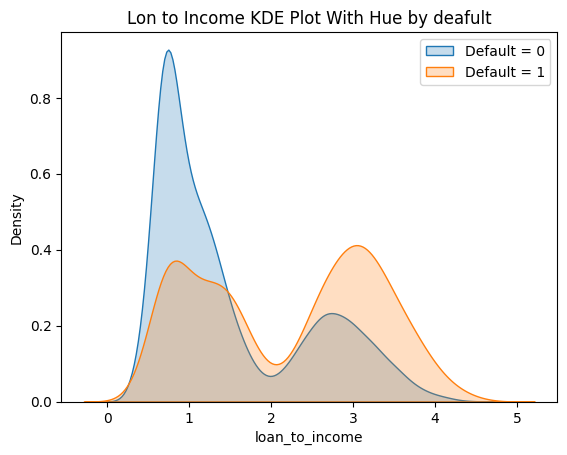

In [246]:
sns.kdeplot(df_train_1[df_train_1.default==0]["loan_to_income"] ,fill=True,label="Default = 0")
sns.kdeplot(df_train_1[df_train_1.default==1]["loan_to_income"] ,fill=True,label="Default = 1")
plt.title(f"Lon to Income KDE Plot With Hue by deafult")
plt.legend()
plt.show()

In [247]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income'],
      dtype='object')

delinquent_months

In [248]:
df_train_1[["delinquent_months",'total_loan_months']]

,delinquent_months,total_loan_months
27434,6,90
13400,4,119
883,14,83
7303,0,37
45124,6,62
...,...,...
11284,23,129
44732,0,80
38158,0,8
860,5,130


In [249]:
df_train_1["delinquent_ratio"] = (df_train_1['delinquent_months']*100/df_train_1['total_loan_months']).round(1)
df_test["delinquent_ratio"] = (df_test['delinquent_months']*100/df_test['total_loan_months']).round(1)

df_train_1[['delinquent_months','total_loan_months','delinquent_ratio']].head(3)

,delinquent_months,total_loan_months,delinquent_ratio
27434,6,90,6.70
13400,4,119,3.40
883,14,83,16.90


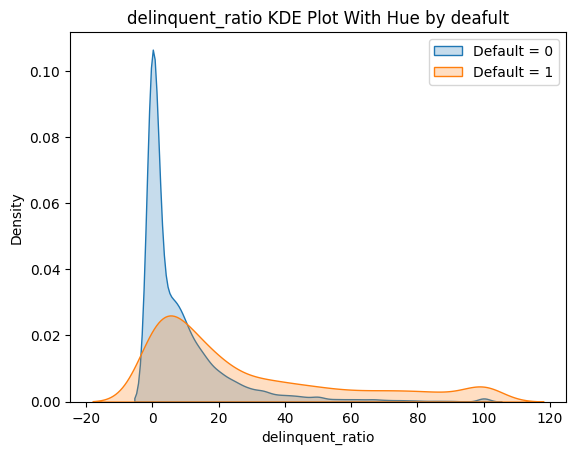

In [250]:
sns.kdeplot(df_train_1[df_train_1.default==0]["delinquent_ratio"] ,fill=True,label="Default = 0")
sns.kdeplot(df_train_1[df_train_1.default==1]["delinquent_ratio"] ,fill=True,label="Default = 1")
plt.title(f"delinquent_ratio KDE Plot With Hue by deafult")
plt.legend()
plt.show()

In [251]:
import numpy as np

In [252]:
df_train_1["avg_dpd_per_delinquency"] = np.where(
    df_train_1['delinquent_months'] !=0,
    (df_train_1['total_dpd']/df_train_1['delinquent_months']).round(1),0)
df_test["avg_dpd_per_delinquency"] = np.where(
    df_test['delinquent_months'] !=0,
    (df_test['total_dpd']/df_test['delinquent_months']).round(1),0)
df_train_1['avg_dpd_per_delinquency'].describe()

count   37487.00
mean        3.29
std         2.90
min         0.00
25%         0.00
50%         4.30
75%         5.80
max        10.00
Name: avg_dpd_per_delinquency, dtype: float64

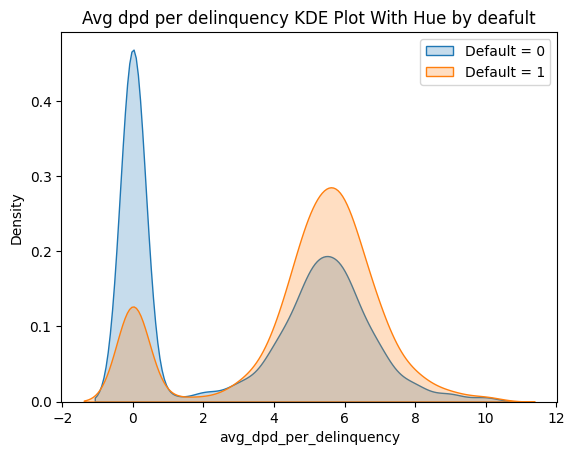

In [253]:
sns.kdeplot(df_train_1[df_train_1.default==0]["avg_dpd_per_delinquency"] ,fill=True,label="Default = 0")
sns.kdeplot(df_train_1[df_train_1.default==1]["avg_dpd_per_delinquency"] ,fill=True,label="Default = 1")
plt.title(f"Avg dpd per delinquency KDE Plot With Hue by deafult")
plt.legend()
plt.show()

In [254]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquent_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

### Feature Selection

In [255]:
df_train_2 =df_train_1.drop(['cust_id','loan_id'],axis=1)
df_test = df_test.drop(['cust_id','loan_id'],axis=1)

In [256]:
df_train_3 = df_train_2.drop(['installment_start_dt','loan_amount','total_loan_months','total_dpd','delinquent_months','income','disbursal_date'],axis=1)
df_test = df_test.drop(['installment_start_dt','loan_amount','total_loan_months','total_dpd','delinquent_months','income','disbursal_date'],axis=1)

In [257]:
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquent_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [258]:
print(df_train_3.info())

<class 'pandas.core.frame.DataFrame'>
Index: 37487 entries, 27434 to 15795
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37487 non-null  int64  
 1   gender                       37487 non-null  object 
 2   marital_status               37487 non-null  object 
 3   employment_status            37487 non-null  object 
 4   number_of_dependants         37487 non-null  int64  
 5   residence_type               37487 non-null  object 
 6   years_at_current_address     37487 non-null  int64  
 7   city                         37487 non-null  object 
 8   state                        37487 non-null  object 
 9   zipcode                      37487 non-null  int64  
 10  loan_purpose                 37487 non-null  object 
 11  loan_type                    37487 non-null  object 
 12  sanction_amount              37487 non-null  int64  
 13  processing_fee   

In [259]:
# col_to_scale = df_train_3.select_dtypes(['int64','float64']).columns
# col_to_scale = col_to_scale.drop(['default','zipcode'])

In [260]:
X_train = df_train_3.drop('default',axis=1)
y_train = df_train_3['default']

from sklearn.preprocessing import MinMaxScaler
col_to_scale = df_train_3.select_dtypes(['int64','float64']).columns
col_to_scale = col_to_scale.drop(['default','zipcode'])
scaler = MinMaxScaler()
X_train[col_to_scale] = scaler.fit_transform(X_train[col_to_scale])

X_train.describe()



,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_delinquency
count,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00
mean,0.41,0.39,0.50,418763.45,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,168837.51,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,110001.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,302001.00,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,400001.00,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.33,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,560001.00,0.10,0.10,0.10,0.10,0.55,0.35,0.16,0.67,1.00,0.62,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,700001.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [261]:
df_test.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquent_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [262]:
X_test = df_test.drop('default',axis=1)
y_test = df_test['default']

col_to_scale = df_test.select_dtypes(['int64','float64']).columns
col_to_scale = col_to_scale.drop(['default','zipcode'])

X_test[col_to_scale] = scaler.transform(X_test[col_to_scale])

X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_delinquency
count,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00
mean,0.41,0.39,0.50,420098.06,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.51,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,169419.47,0.12,0.11,0.11,0.11,0.24,0.25,0.13,0.37,0.41,0.26,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,110001.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,302001.00,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,411001.00,0.05,0.05,0.05,0.05,0.36,0.20,0.08,0.67,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,560001.00,0.10,0.10,0.10,0.10,0.55,0.35,0.16,1.00,1.00,0.75,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,700001.00,0.95,1.00,1.00,1.00,1.00,1.00,0.88,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [263]:
# !pip install statsmodels

In [264]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Columns'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [265]:
calculate_vif(X_train[col_to_scale])

c:\Users\lv909\anaconda3\envs\python-starter\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Columns,VIF
0,age,5.58
1,number_of_dependants,2.72
2,years_at_current_address,3.36
3,sanction_amount,102.15
4,processing_fee,inf
5,gst,inf
6,net_disbursement,inf
7,loan_tenure_months,6.13
8,principal_outstanding,16.27
9,bank_balance_at_application,9.27


In [266]:
feature_to_drop_vif = ['sanction_amount','processing_fee','gst','net_disbursement','principal_outstanding']
X_train_1 = X_train.drop(feature_to_drop_vif,axis=1)
num_col = X_train_1.select_dtypes(['int16','float64']).columns
num_col

Index(['age', 'number_of_dependants', 'years_at_current_address',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquent_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [267]:
vif_df = calculate_vif(X_train_1[num_col])
vif_df

,Columns,VIF
0,age,5.29
1,number_of_dependants,2.72
2,years_at_current_address,3.34
3,loan_tenure_months,5.97
4,bank_balance_at_application,1.79
5,number_of_open_accounts,4.31
6,number_of_closed_accounts,2.33
7,enquiry_count,6.28
8,credit_utilization_ratio,2.88
9,loan_to_income,4.51


In [268]:
selected_numeric_feature_vif = vif_df.Columns.values
selected_numeric_feature_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquent_ratio', 'avg_dpd_per_delinquency'], dtype=object)

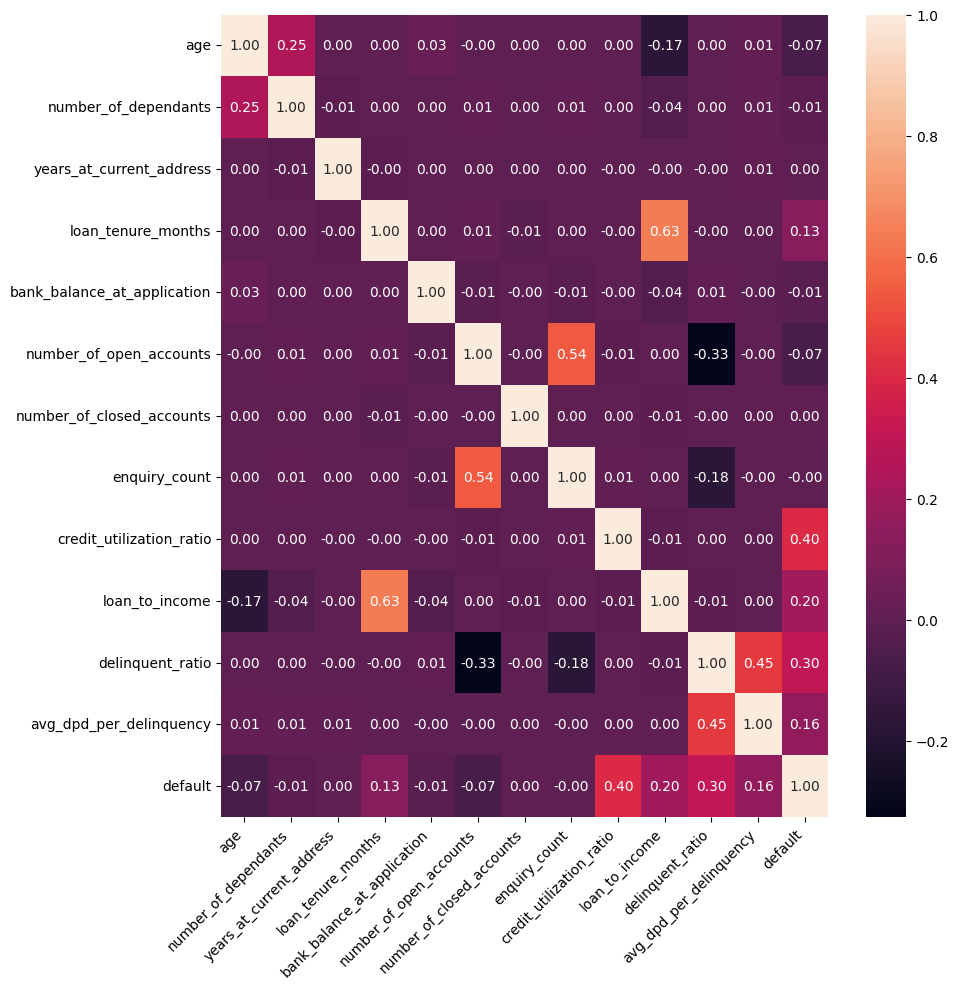

In [269]:
plt.figure(figsize=(10,10))
cm = df_train_3[num_col.append(pd.Index(['default']))].corr()
sns.heatmap(cm,annot=True,fmt='0.2f')
plt.xticks(rotation = 45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<h5 align='center'>Weight of Evidence (woe) & Information values (IV)</h5>

In [270]:
def calculate_woe_iv(df, feature, target):
        grouped = df.groupby(feature)[target].agg(['count', 'sum'])
        grouped = grouped.rename(columns={'count': 'total', 'sum': 'bad'})
        grouped['good'] = grouped['total'] - grouped['bad']
    
        total_good = grouped['good'].sum()
        total_bad = grouped['bad'].sum()
    
        grouped['good_pc'] = grouped['good'] / total_good
        grouped['bad_pc'] = grouped['bad'] / total_bad
    
        # Calculate WOE
        grouped['woe'] = np.log((grouped['good_pc'] + 1e-6) / (grouped['bad_pc'] + 1e-6))
        # Calculate IV
        grouped['iv'] = (grouped['good_pc'] - grouped['bad_pc']) * grouped['woe']
    
        grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
        grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)
    
        total_iv = grouped['iv'].sum()
    
        return grouped, total_iv
    
grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1, y_train], axis='columns'), 'loan_purpose', 'default')
grouped


,total,bad,good,good_pc,bad_pc,woe,iv
loan_purpose,,,,,,,
Auto,7437,314,7123,0.21,0.10,0.75,0.08
Education,5626,546,5080,0.15,0.17,-0.14,0.00
Home,11271,1744,9527,0.28,0.55,-0.68,0.18
Personal,13153,585,12568,0.37,0.18,0.69,0.13


In [271]:
# Example for the create a bins for the numerics vaues or the group
pd.cut(X_train_1['loan_to_income'],bins=10)

27434       (0.6, 0.7]
13400       (0.1, 0.2]
883      (-0.001, 0.1]
7303        (0.1, 0.2]
45124       (0.3, 0.4]
             ...      
11284       (0.2, 0.3]
44732       (0.2, 0.3]
38158       (0.5, 0.6]
860         (0.2, 0.3]
15795       (0.1, 0.2]
Name: loan_to_income, Length: 37487, dtype: category
Categories (10, interval[float64, right]): [(-0.001, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]

In [272]:
iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
       _,iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1),feature,'default')
    else:
        X_binned = pd.cut(X_train_1[feature],bins=10,labels=False)
        _,iv = calculate_woe_iv(pd.concat([X_binned,y_train],axis=1),feature,'default')

    iv_values[feature] = iv    

iv_values       

{'age': np.float64(0.07592340141546713),
 'gender': np.float64(0.000482275422640831),
 'marital_status': np.float64(0.0021966769207893092),
 'employment_status': np.float64(0.0024478124405412824),
 'number_of_dependants': np.float64(0.0036458731113075773),
 'residence_type': np.float64(0.2594011360325894),
 'years_at_current_address': np.float64(0.0010425233447007426),
 'city': np.float64(0.0008178622479802348),
 'state': np.float64(0.0007881906479118233),
 'zipcode': np.float64(0.0007435953235267049),
 'loan_purpose': np.float64(0.393773852197928),
 'loan_type': np.float64(0.1730464960950314),
 'loan_tenure_months': np.float64(0.2345037573818089),
 'bank_balance_at_application': np.float64(0.00424114452811779),
 'number_of_open_accounts': np.float64(0.0732422308237511),
 'number_of_closed_accounts': np.float64(0.0002628074482473082),
 'enquiry_count': np.float64(0.005484902942316503),
 'credit_utilization_ratio': np.float64(2.422786111435434),
 'loan_to_income': np.float64(0.491555015

In [273]:
pd.set_option('display.float_format',lambda x : '{:.3f}'.format(x))
iv_df = pd.DataFrame(list(iv_values.items()),columns=['Features','IV'])
iv_df = iv_df.sort_values(by='IV',ascending=False)
iv_df

,Features,IV
17,credit_utilization_ratio,2.423
19,delinquent_ratio,0.678
18,loan_to_income,0.492
20,avg_dpd_per_delinquency,0.421
10,loan_purpose,0.394
5,residence_type,0.259
12,loan_tenure_months,0.235
11,loan_type,0.173
0,age,0.076
14,number_of_open_accounts,0.073


In [274]:
selected_feature_iv = [feature for feature, iv in iv_values.items() if iv >0.02]
selected_feature_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquent_ratio',
 'avg_dpd_per_delinquency']

Feature Encoding

In [275]:
X_train_reduced = X_train_1[selected_feature_iv]
X_test_reduced = X_test[selected_feature_iv]

In [276]:
X_train_reduced.head()

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_delinquency
27434,0.519,Owned,Home,Secured,0.340,1.000,0.596,0.609,0.067,0.550
13400,0.212,Owned,Auto,Secured,0.509,0.667,0.929,0.183,0.034,0.420
883,0.615,Mortgage,Personal,Unsecured,0.245,0.333,0.838,0.084,0.169,0.560
7303,0.481,Owned,Auto,Secured,0.283,0.000,0.343,0.187,0.000,0.000
45124,0.250,Owned,Education,Secured,0.736,0.333,0.192,0.361,0.097,0.470


In [277]:
X_train_encoded = pd.get_dummies(X_train_reduced,drop_first=True)
X_test_encoded = pd.get_dummies(X_test_reduced,drop_first=True)

In [278]:
X_train_encoded.head()

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
27434,0.519,0.340,1.000,0.596,0.609,0.067,0.550,True,False,False,True,False,False
13400,0.212,0.509,0.667,0.929,0.183,0.034,0.420,True,False,False,False,False,False
883,0.615,0.245,0.333,0.838,0.084,0.169,0.560,False,False,False,False,True,True
7303,0.481,0.283,0.000,0.343,0.187,0.000,0.000,True,False,False,False,False,False
45124,0.250,0.736,0.333,0.192,0.361,0.097,0.470,True,False,True,False,False,False


<h3 align="center" style="color:blue">Model Selection</h3>

### Attempt 1

1. Logistic Regration, RandomForest & XGB
2. No handling of class imbalance

In [279]:
y_train.value_counts()

default
0    34298
1     3189
Name: count, dtype: int64

In [280]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report

model = LogisticRegression()

model.fit(X_train_encoded,y_train)

y_pred = model.predict(X_test_encoded)


mse = mean_squared_error(y_test,y_pred)

report = classification_report(y_test,y_pred)

print(report)



              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.69      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [281]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report

model = RandomForestClassifier()

model.fit(X_train_encoded,y_train)

y_pred= model.predict(X_test_encoded)


report = classification_report(y_test,y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.85      0.70      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.91      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [282]:
# !pip install xgboost

In [283]:
from xgboost import XGBClassifier

model = XGBClassifier()

model.fit(X_train_encoded,y_train)

y_pred = model.predict(X_test_encoded)

report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11390
           1       0.82      0.74      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.86      0.88     12498
weighted avg       0.96      0.96      0.96     12498



In [284]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C' : np.logspace(-4,4,20),#Logistically spaced values from 10^-4 to 10^4
    'solver':['labfgs','saga','liblinear','newton-cg'] # Algorithm to use in the optimization problem
}

log_reg  = LogisticRegression(max_iter=10000)

random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1',
    cv=3,
    verbose=2,
    n_jobs=-1
)

random_search.fit(X_train_encoded,y_train)

print(f'Beast Parameters: {random_search.best_params_}')
print(f'Best Score: {random_search.best_score_}')

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)

print('classification report')
print(classification_report(y_test,y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\lv909\anaconda3\envs\python-starter\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
36 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lv909\anaconda3\envs\python-starter\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lv909\anaconda3\envs\python-starter\Lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Users\lv909\anaconda3\envs\python-starter\Lib\site-packages\sklearn\base.py", line 469, in _validate_params
    va

Beast Parameters: {'solver': 'liblinear', 'C': np.float64(29.763514416313132)}
Best Score: 0.7628897930994731
classification report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.83      0.71      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.85      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [285]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators':[100,150,200,250,300],
    'max_depth':[3,4,5,6,7,8,9,10],
    'learning_rate':[0.01,0.03,0.05,0.2,0.25,0.3],
    'subsample':[0.6,0.7,0.8,0.9,1.0],
    'scale_pos_weight':[1,2,3,5,7,10],
    'reg_alpha':[0.01,0.1,0.5,1.0,5.0,10.0],# L1 regularization term
    'reg_lambda':[0.01,0.1,0.5,1.0,5.0,10.0] # L2 regularization term

}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=100,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_encoded,y_train)

print(f'Beast Parameters: {random_search.best_params_}')
print(f'Best Score: {random_search.best_score_}')

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)

print('classification report')
print(classification_report(y_test,y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Beast Parameters: {'subsample': 0.7, 'scale_pos_weight': 2, 'reg_lambda': 0.01, 'reg_alpha': 5.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.03}
Best Score: 0.788169511805494
classification report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11390
           1       0.78      0.83      0.80      1108

    accuracy                           0.96     12498
   macro avg       0.88      0.90      0.89     12498
weighted avg       0.96      0.96      0.96     12498



### Attempt 2

1. Logistic Regration & XGB
2. Handle Class Imblance Using Under sampling

In [286]:
!pip install imblearn

In [287]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_train_rus, y_train_rus = rus.fit_resample(X_train_encoded,y_train)
y_train_rus.value_counts()

default
0    3189
1    3189
Name: count, dtype: int64

In [288]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report

model = LogisticRegression()

model.fit(X_train_rus,y_train_rus)

y_pred = model.predict(X_test_encoded)


report = classification_report(y_test,y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.99      0.92      0.96     11390
           1       0.53      0.95      0.68      1108

    accuracy                           0.92     12498
   macro avg       0.76      0.93      0.82     12498
weighted avg       0.95      0.92      0.93     12498



In [289]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_rus,y_train_rus)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test,y_pred)

print(report)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     11390
           1       0.49      0.98      0.66      1108

    accuracy                           0.91     12498
   macro avg       0.75      0.94      0.80     12498
weighted avg       0.95      0.91      0.92     12498



### Atempt 3
1. Logistic Regration
2. Handle Class Imbalance uing SMOTHE Tomek
3. Parameter tunning Uing Optuna

In [290]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded,y_train)
y_train_smt.value_counts()

default
0    34223
1    34223
Name: count, dtype: int64

In [291]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report

model = LogisticRegression()

model.fit(X_train_smt,y_train_smt)

y_pred = model.predict(X_test_encoded)


report = classification_report(y_test,y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [292]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_smt,y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test,y_pred)

print(report)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     11390
           1       0.55      0.96      0.70      1108

    accuracy                           0.93     12498
   macro avg       0.77      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [293]:
# ! pip install optuna

In [294]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [295]:
def objectve(trial):
    param = {
        'C':trial.suggest_float('C',1e-4,1e4,log=True),
        'solver':trial.suggest_categorical('solver',['lbfgs','liblinear','saga','newton-cg']),
        'tol':trial.suggest_float('tol',1e-6,1e-1,log=True),
        'class_weight':trial.suggest_categorical('class_weight',[None,'balanced'])
    }
    model = LogisticRegression(**param,max_iter=10000)

    f1_scorer = make_scorer(f1_score,average='macro')
    scores = cross_val_score(model,X_train_smt,y_train_smt,cv=3,scoring=f1_scorer,n_jobs=-1)

    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objectve,n_trials=50)

[I 2025-09-11 00:14:11,820] A new study created in memory with name: no-name-850cd625-00f0-4150-88c7-04dbe3e300d2
[I 2025-09-11 00:14:12,206] Trial 0 finished with value: 0.9448474593105244 and parameters: {'C': 255.54528815486276, 'solver': 'liblinear', 'tol': 0.003104471999675904, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9448474593105244.
[I 2025-09-11 00:14:12,362] Trial 1 finished with value: 0.771284363879972 and parameters: {'C': 0.005293912975270883, 'solver': 'newton-cg', 'tol': 0.08657611971831917, 'class_weight': None}. Best is trial 0 with value: 0.9448474593105244.
[I 2025-09-11 00:14:12,920] Trial 2 finished with value: 0.9446546862409293 and parameters: {'C': 1.8481118409364272, 'solver': 'liblinear', 'tol': 7.684345225226982e-06, 'class_weight': None}. Best is trial 0 with value: 0.9448474593105244.
[I 2025-09-11 00:14:13,179] Trial 3 finished with value: 0.8839573849615902 and parameters: {'C': 0.0013506119138469894, 'solver': 'liblinear', 'tol': 0.000

In [296]:
trail = study_logistic.best_trial
print('f1 Score : {}'.format(trail.values))
print('Params : ')
for key, value in trail.params.items():
    print('{} : {}'.format(key,value))


best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt,y_train_smt)

y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test,y_pred)
print(report)

f1 Score : [0.9450503714537507]
Params : 
C : 331.86149760618105
solver : saga
tol : 0.01919821351652048
class_weight : balanced
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.93      0.84     12498
weighted avg       0.96      0.93      0.94     12498



#### Attempt 4 
1. XGBoost
2. Handle Class lmbalance using SMOTE Tomek
3. Parameter tunning uing optuna

In [297]:
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
#  Define the Optuna objective function
def objective(trial):
    # Suggest hyperparameters
    params = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "use_label_encoder": False,
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
    }

    model = XGBClassifier(**params)

    # Stratified K-Fold cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scorer = make_scorer(f1_score)

    # Calculate mean F1 score
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=cv, scoring=f1_scorer)
    return scores.mean()

# 3. Create and run the Optuna study
study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective, n_trials=50)

# 4. Print results
print("Best trial:")
print("  Value (Mean F1):", study_xgb.best_trial.value)
print("  Params:", study_xgb.best_trial.params)

[I 2025-09-11 00:14:29,266] A new study created in memory with name: no-name-c23bf477-81db-4869-a181-f87aa7bbd9d8
c:\Users\lv909\anaconda3\envs\python-starter\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:14:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\lv909\anaconda3\envs\python-starter\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:14:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\lv909\anaconda3\envs\python-starter\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:14:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\lv909\anaconda3\envs\python-starter\Lib\site-p

Best trial:
  Value (Mean F1): 0.9818214097374076
  Params: {'n_estimators': 366, 'max_depth': 10, 'learning_rate': 0.16276471927033043, 'subsample': 0.8116357706354437, 'colsample_bytree': 0.7873632196698338, 'gamma': 0.2330664262406299, 'min_child_weight': 3}


In [298]:
trail = study_xgb.best_trial
print('f1 Score : {}'.format(trail.values))
print('Params : ')
for key, value in trail.params.items():
    print('{} : {}'.format(key,value))


best_model_xgb = XGBClassifier(**study_xgb.best_params)
best_model_xgb.fit(X_train_smt,y_train_smt)

y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test,y_pred)
print(report)

f1 Score : [0.9818214097374076]
Params : 
n_estimators : 366
max_depth : 10
learning_rate : 0.16276471927033043
subsample : 0.8116357706354437
colsample_bytree : 0.7873632196698338
gamma : 0.2330664262406299
min_child_weight : 3
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11390
           1       0.77      0.80      0.78      1108

    accuracy                           0.96     12498
   macro avg       0.88      0.89      0.88     12498
weighted avg       0.96      0.96      0.96     12498



In [299]:
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.93      0.84     12498
weighted avg       0.96      0.93      0.94     12498



In [300]:
from sklearn.metrics import roc_curve, auc

# Get probability of positive class (class=1)
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

# Optionally compute AUC
roc_auc = auc(fpr, tpr)

print("FPR:", fpr)
print("TPR:", tpr)
print("AUC:", roc_auc)


FPR: [0.00000000e+00 0.00000000e+00 0.00000000e+00 8.77963126e-05
 8.77963126e-05 1.75592625e-04 1.75592625e-04 2.63388938e-04
 2.63388938e-04 3.51185250e-04 3.51185250e-04 4.38981563e-04
 4.38981563e-04 5.26777875e-04 5.26777875e-04 7.02370500e-04
 7.02370500e-04 7.90166813e-04 7.90166813e-04 8.77963126e-04
 8.77963126e-04 9.65759438e-04 9.65759438e-04 1.05355575e-03
 1.05355575e-03 1.14135206e-03 1.14135206e-03 1.31694469e-03
 1.31694469e-03 1.49253731e-03 1.49253731e-03 1.58033363e-03
 1.58033363e-03 1.66812994e-03 1.66812994e-03 1.75592625e-03
 1.75592625e-03 2.01931519e-03 2.01931519e-03 2.10711150e-03
 2.10711150e-03 2.19490781e-03 2.19490781e-03 2.28270413e-03
 2.28270413e-03 2.37050044e-03 2.37050044e-03 2.45829675e-03
 2.45829675e-03 2.63388938e-03 2.63388938e-03 2.72168569e-03
 2.72168569e-03 2.89727831e-03 2.89727831e-03 2.98507463e-03
 2.98507463e-03 3.07287094e-03 3.07287094e-03 3.16066725e-03
 3.16066725e-03 3.24846356e-03 3.24846356e-03 3.33625988e-03
 3.33625988e-03 3.4

In [301]:
from sklearn.metrics import auc

area = auc(fpr,tpr)
area

0.9829988938298526

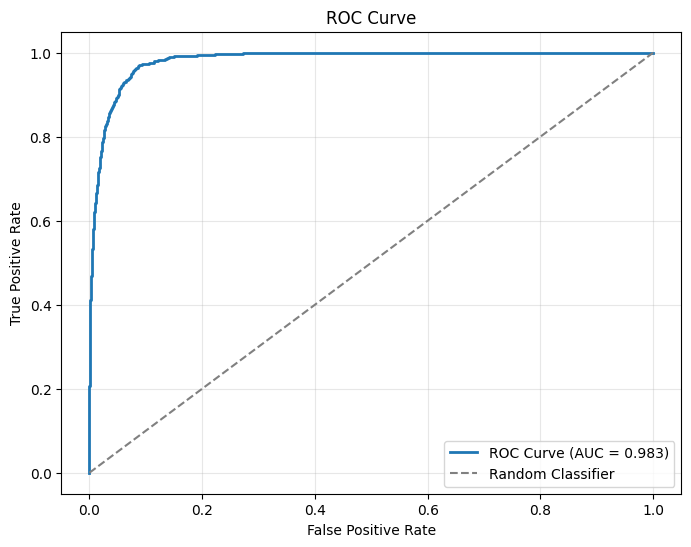

In [302]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [303]:
probabilities =  best_model_logistic.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Defult Probability': probabilities
})

df_eval.head(3)



,Default Truth,Defult Probability
33553,0,0.000
9427,0,0.757
199,0,0.121


## Model Evaluation : Rankordering, KS statistic, Gini coeff

In [304]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
df_eval.head(3)

,Default Truth,Default Probability
33553,0,0.000
9427,0,0.757
199,0,0.121


In [305]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
33553,0,0.000,1
9427,0,0.757,8
199,0,0.121,7


In [306]:
df_eval[df_eval.Decile==8]['Default Probability'].describe()

count   1250.000
mean       0.485
std        0.188
min        0.200
25%        0.318
50%        0.469
75%        0.652
max        0.817
Name: Default Probability, dtype: float64

In [307]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_decile.reset_index(inplace=True)
df_decile

C:\Users\lv909\AppData\Local\Temp\ipykernel_17104\4037021561.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1250.000
3,3,0.000,0.000,0.000,1249.000
4,4,0.000,0.001,0.000,1250.000
5,5,0.001,0.005,1.000,1249.000
6,6,0.005,0.030,2.000,1247.000
7,7,0.030,0.199,16.000,1234.000
8,8,0.200,0.817,171.000,1079.000
9,9,0.818,1.000,918.000,332.000


In [308]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,0.000,0.000,0.000,1250.000,0.000,100.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000
2,2,0.000,0.000,0.000,1250.000,0.000,100.000
3,3,0.000,0.000,0.000,1249.000,0.000,100.000
4,4,0.000,0.001,0.000,1250.000,0.000,100.000
5,5,0.001,0.005,1.000,1249.000,0.080,99.920
6,6,0.005,0.030,2.000,1247.000,0.160,99.840
7,7,0.030,0.199,16.000,1234.000,1.280,98.720
8,8,0.200,0.817,171.000,1079.000,13.680,86.320
9,9,0.818,1.000,918.000,332.000,73.440,26.560


In [309]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,0.818,1.000,918.000,332.000,73.440,26.560
1,8,0.200,0.817,171.000,1079.000,13.680,86.320
2,7,0.030,0.199,16.000,1234.000,1.280,98.720
3,6,0.005,0.030,2.000,1247.000,0.160,99.840
4,5,0.001,0.005,1.000,1249.000,0.080,99.920
5,4,0.000,0.001,0.000,1250.000,0.000,100.000
6,3,0.000,0.000,0.000,1249.000,0.000,100.000
7,2,0.000,0.000,0.000,1250.000,0.000,100.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [310]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,0.818,1.000,918.000,332.000,73.440,26.560,918.000,332.000
1,8,0.200,0.817,171.000,1079.000,13.680,86.320,1089.000,1411.000
2,7,0.030,0.199,16.000,1234.000,1.280,98.720,1105.000,2645.000
3,6,0.005,0.030,2.000,1247.000,0.160,99.840,1107.000,3892.000
4,5,0.001,0.005,1.000,1249.000,0.080,99.920,1108.000,5141.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1108.000,6391.000
6,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000
7,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000


In [311]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,0.818,1.000,918.000,332.000,73.440,26.560,918.000,332.000,82.852,2.915
1,8,0.200,0.817,171.000,1079.000,13.680,86.320,1089.000,1411.000,98.285,12.388
2,7,0.030,0.199,16.000,1234.000,1.280,98.720,1105.000,2645.000,99.729,23.222
3,6,0.005,0.030,2.000,1247.000,0.160,99.840,1107.000,3892.000,99.910,34.170
4,5,0.001,0.005,1.000,1249.000,0.080,99.920,1108.000,5141.000,100.000,45.136
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1108.000,6391.000,100.000,56.111
6,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000,100.000,67.076
7,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000,100.000,78.051
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000,100.000,89.025
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000,100.000,100.000


In [312]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,0.818,1.000,918.000,332.000,73.440,26.560,918.000,332.000,82.852,2.915,79.937
1,8,0.200,0.817,171.000,1079.000,13.680,86.320,1089.000,1411.000,98.285,12.388,85.897
2,7,0.030,0.199,16.000,1234.000,1.280,98.720,1105.000,2645.000,99.729,23.222,76.507
3,6,0.005,0.030,2.000,1247.000,0.160,99.840,1107.000,3892.000,99.910,34.170,65.739
4,5,0.001,0.005,1.000,1249.000,0.080,99.920,1108.000,5141.000,100.000,45.136,54.864
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1108.000,6391.000,100.000,56.111,43.889
6,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000,100.000,67.076,32.924
7,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000,100.000,78.051,21.949
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000,100.000,89.025,10.975
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000,100.000,100.000,0.000


To assess whether rank ordering is followed, we should look at whether higher deciles (those with higher predicted probabilities) have higher event rates compared to lower deciles. Rank ordering means that as you move from the top decile to the bottom decile, the event rate should generally decrease.

Non-Events - termed as good (customers) who do not default. Events - termed as bad (customers) who default.

Events and Non-Events terms are interchanged based on usecase to usecase.

eg: for marketing usecase, which customer to reach out (who will take loan based on offers) will be events - here it will termed as good, and the customers who will not take loans will be non-events (bad).

**Insights from the Decile Table**

1. Top Deciles

* The first decile (Decile 9) has a high event rate of 72.00% and a non-event rate of 28.00%. This indicates that the model is highly confident in predicting events in this decile.
* The second decile (Decile 8) also shows a significant event rate of 12.72%, with a cumulative event rate reaching 98.6%.

2. Middle Deciles:

* Deciles 7 and 6 show a significant drop in event rates

3. Lower Deciles:

* Deciles 5 to 0 show zero events, with all predictions being non-events. These deciles collectively have a non-event rate of 100%.

4. KS Statistic:

* The KS statistic, which is the maximum difference between cumulative event rates and cumulative non-event rates, is highest at Decile 8 with a value of 85.98%. This suggests that the model performs best at distinguishing between events and non-events up to this decile.

* The KS value gradually decreases in the following deciles, indicating a decrease in model performance for distinguishing between events and non-events.

**KS Value**

The highest KS value is 85.98%, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile. (If KS is in top 3 decile and score above 40, it is considered a good predictive model.)

In [313]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.9829988938298526
Gini Coefficient: 0.9659977876597052


AUC of 0.98: The model is very good at distinguishing between events and non-events.

Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect rank ordering capability.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

#### Finalize The Model and Visualize Feature Importance

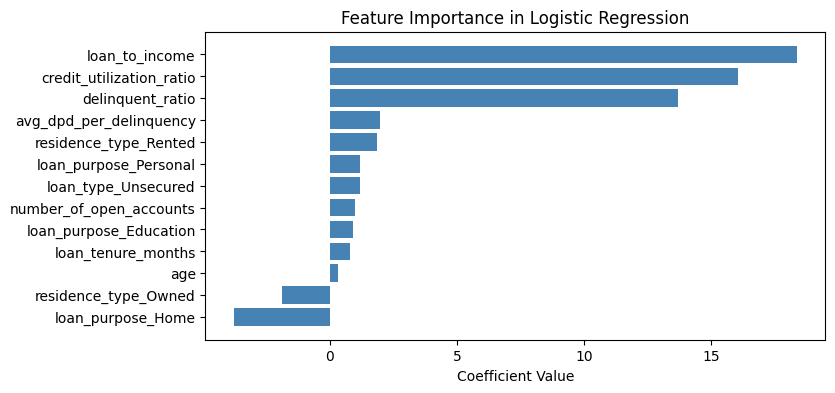

In [315]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Save the Model

In [316]:
X_test_encoded.head(2)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
33553,0.346,0.528,0.333,0.121,0.258,0.043,0.900,True,False,True,False,False,False
9427,0.288,0.623,1.000,0.859,0.689,0.000,0.000,True,False,False,True,False,False


In [317]:
X_test_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquent_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [319]:
col_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquent_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [320]:
X_train_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquent_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [323]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': col_to_scale
}
dump(model_data, 'artifacts/model_data.joblib')

['artifacts/model_data.joblib']

In [324]:
final_model.coef_, final_model.intercept_

(array([[ 0.31354305,  0.81131416,  1.01428267, 16.02444742, 18.37272446,
         13.68271461,  1.97156754, -1.87583423,  1.87070839,  0.91327187,
         -3.77272179,  1.17588781,  1.17588781]]),
 array([-21.23084778]))